In [1]:
import pandas as pd
df=pd.read_csv("T5DS.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# ***Data Pre-Processing***

In [2]:
import numpy as np,matplotlib.pyplot as plt,seaborn as sns,warnings
warnings.simplefilter(action='ignore')

In [3]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [3]:
df=df.rename(columns={'Unnamed: 0':'Index'})
df.isnull().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.columns

Index(['Index', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Index,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


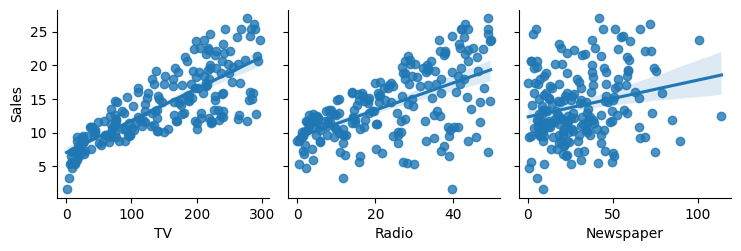

In [10]:
sns.pairplot(df,x_vars=['TV', 'Radio', 'Newspaper'],y_vars='Sales',kind="reg")
plt.show()

array([[<Axes: title={'center': 'Index'}>,
        <Axes: title={'center': 'TV'}>],
       [<Axes: title={'center': 'Radio'}>,
        <Axes: title={'center': 'Newspaper'}>],
       [<Axes: title={'center': 'Sales'}>, <Axes: >]], dtype=object)

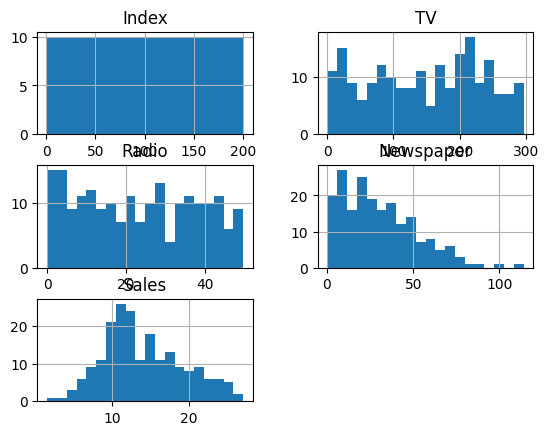

In [11]:
df.hist(bins=20)

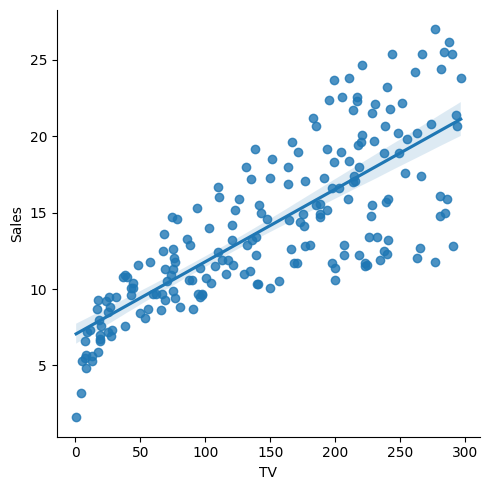

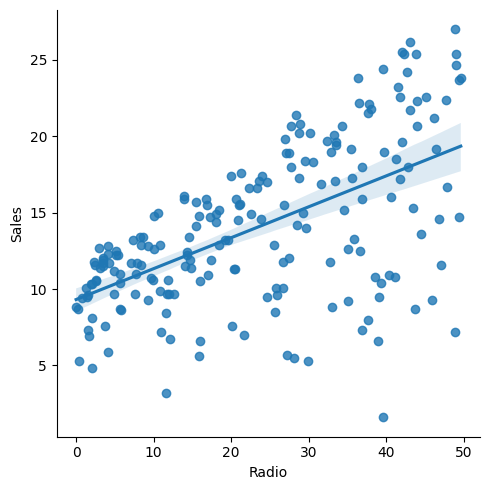

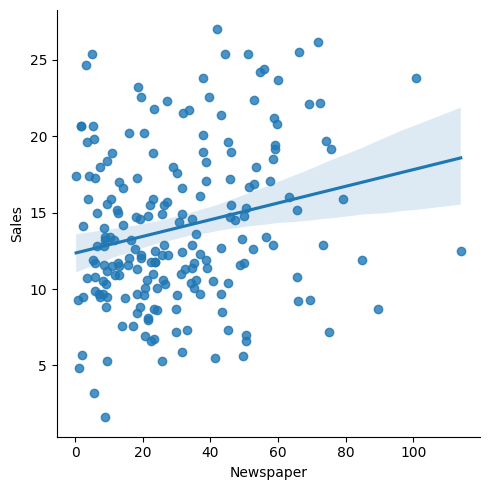

In [17]:
sns.lmplot(x='TV',y='Sales',data=df)
sns.lmplot(x='Radio',y='Sales',data=df)
sns.lmplot(x='Newspaper',y='Sales',data=df)


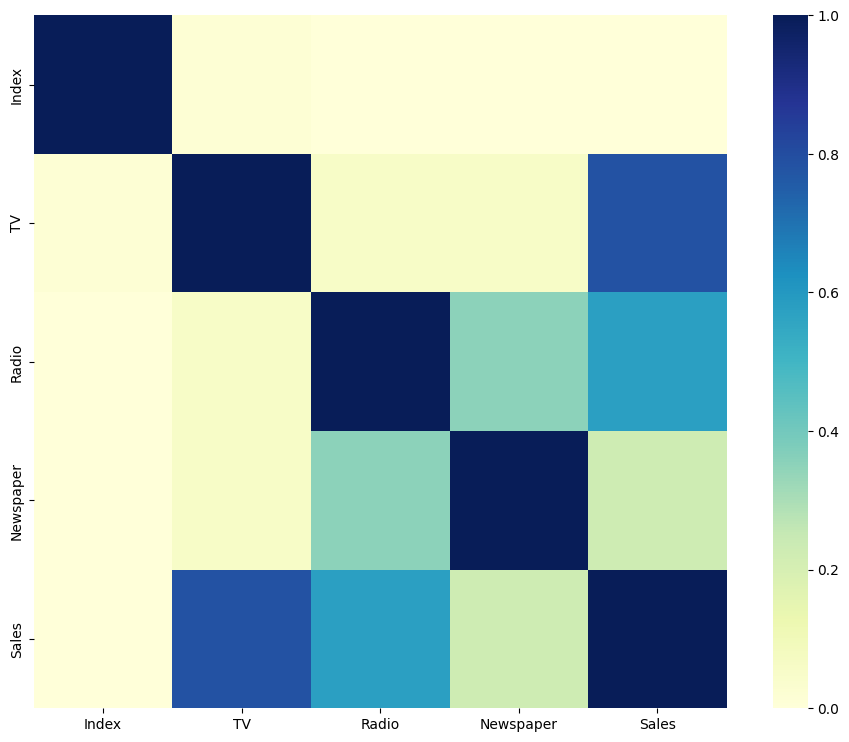

In [19]:
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(),vmin=0,vmax=1,square=True,cmap="YlGnBu",ax=ax)
plt.show()

# ***Model***

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df=df.drop('Index',axis=1)

In [12]:
x=df.drop('Sales',axis=1)
y=df[["Sales"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

In [14]:
model=LinearRegression()

In [15]:
model.fit(x_train,y_train)
print(model.score(x_test,y_test))

0.9035487616562967


In [16]:
pred=model.predict(x_test)
print(pred)

[[15.17114645]
 [10.25154915]
 [16.41254837]
 [21.76095589]
 [15.86530913]
 [ 8.97617052]
 [18.10440327]
 [11.39318419]
 [17.3404717 ]
 [ 8.68177111]
 [11.4525485 ]
 [ 9.75987544]
 [12.15747378]
 [19.13607316]
 [16.91193948]
 [ 6.55699917]
 [14.08479552]
 [ 7.78386381]
 [21.0641119 ]
 [12.41405932]
 [19.18489131]
 [ 7.56758135]
 [17.34286112]
 [10.15366622]
 [17.13838849]
 [ 7.07247721]
 [20.44452084]
 [12.22648014]
 [15.03473805]
 [14.2817864 ]
 [23.12087716]
 [20.29904779]
 [19.89058198]
 [16.54812791]
 [ 9.95405853]
 [10.10446569]
 [16.85242673]
 [18.24811104]
 [13.12229175]
 [19.5079749 ]
 [15.41448503]
 [13.99790087]
 [ 9.69949635]
 [12.17142004]
 [24.69121706]
 [12.03167221]
 [13.88806787]
 [ 9.04451374]
 [22.74519892]
 [14.1949423 ]]


In [17]:
x_test.head(1)

,TV,Radio,Newspaper
45,175.1,22.5,31.5


In [18]:
import pickle as pk
pk.dump(model,open('sales.sav','wb'))